# Predicting the wine variety using  Machine Learning 

# 1. Problem Definition
*  How well can we predict the variety of the wine by training our model with the `train` data and predicting the wine variety of the `test` data

# 2. Data
* train.csv contains the training data
* test.csv contains test data

# 3. Evaluation
* We'll be using the RandomForestClassifier model for this Machine Learning assignment
### *Note :* I've tried and tested other models with comparision to RandomForestClassifier

# 4. Features of the Data 

### Features/ Columns in data set: 
* user_name - user_name of the reviewer
* country -The country that the wine is from.
* review_title - The title of the wine review, which often contains the vintage.
* review_description - A verbose review of the wine.
* designation - The vineyard within the winery where the grapes that made the wine are from.
* points - ratings given by the user. The ratings are between 0 -100.
* price - The cost for a bottle of the wine
* province - The province or state that the wine is from.
* region_1 - The wine-growing area in a province or state (ie Napa).
* region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.
* winery - The winery that made the wine
* variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment


# 5. The WorkFlow

## Following are the Steps that we will take :
1. Importing the required libraries
2. Importing the Training Dataset
3. Visualising the model and gaining insights
4. Getting the Data
    4.1 Converting the non-numeric Data to Categories
    4.2 Filling out missing numeric values
    4.3 Filling out missing non-numeric/ categorical values
5. Exporting the Processed Model for Backup
6. Modelling the Data
    6.1 Imports for modelling the Data
    6.2 Splitting the Data into Testing and Validation Sets
7. Training or Model using Training Dataset
8. Testing our Model
9. Improving the Model by Tuning Hyperparameters
    9.1 Tuning the Hyperparameters manually
    9.2 tuning the Hyperparameters by RandomisedSearchCV
10. Building the Ideal Model
11. Making predictions on `test.csv`
12. Preprocessing the `test.csv`
13. Making predictions on processed `test.csv`
14. Replacing numeric values with Original Values
15. Exporting the final dataset as csv file.

## 1. Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## 2. Importing the Training Dataset

In [3]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


## 3. Vizualising the Data Model 

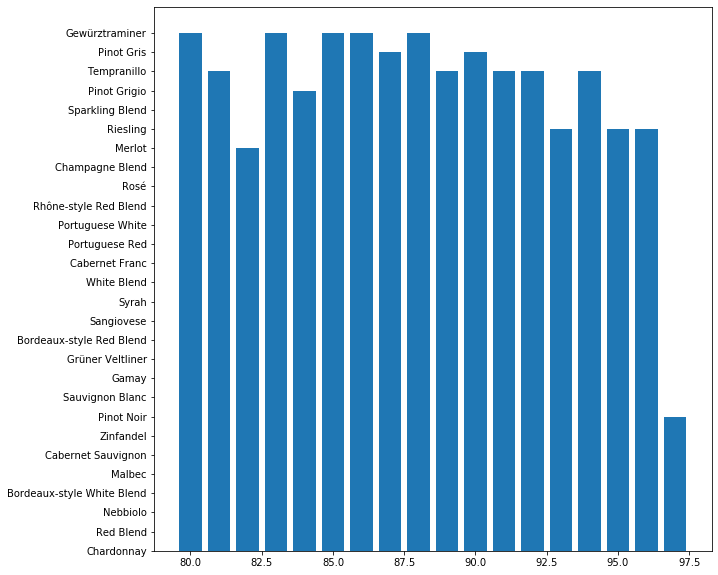

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
ax.bar(train_data["points"][:1000],train_data["variety"][:1000]);

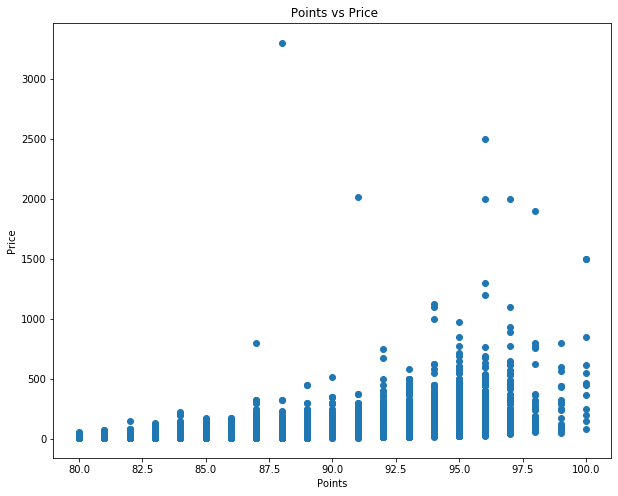

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(train_data["points"],train_data["price"]);
ax.set(title = " Points vs Price",
       xlabel = "Points",
       ylabel = "Price");


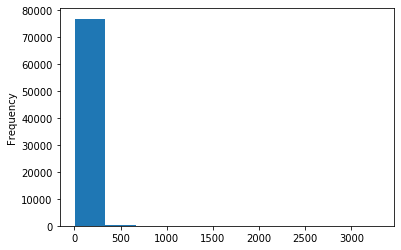

In [13]:
train_data["price"].plot.hist();

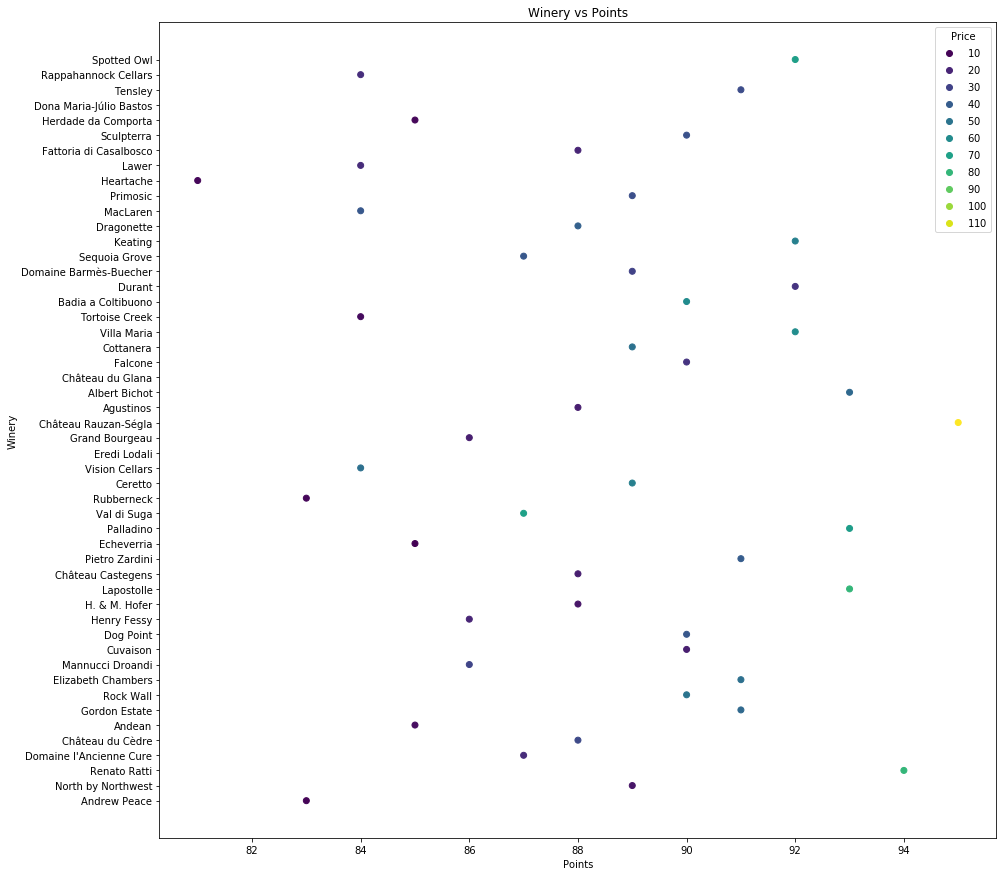

In [29]:
# Basic Visualization of first 50 Winery vs Points and Price
fig , ax = plt.subplots(figsize=(15,15))
scatter = ax.scatter( train_data["points"][:50],
           train_data["winery"][:50],
           c = train_data["price"][:50])
ax.set(title = "Winery vs Points",
       xlabel = "Points",
       ylabel = "Winery")
ax.legend(*scatter.legend_elements(), title= "Price");

## 4. Getting the Data Ready

In [30]:
train_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [31]:
train_data.isna().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

## Steps to fill out missing data and convert non-numeric data to numeric

1. We will convert the non-numeric data into pandas categories. 
2. We will then fill missing numeric value first with the columns median
3. We will then fill missing non-numeric/ categorial values

### 4.1. Coverting the non-numeric data into pandas categories

In [32]:
# Finding the columns which have numeric data
for label, content in train_data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

user_name
country
review_title
review_description
designation
province
region_1
region_2
winery
variety


In [38]:
# Conerting the non-numeric data into category
def non_numeric_to_category(df):
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()


In [39]:
non_numeric_to_category(train_data)

### 4.2. Filling missing numeric values first with the columns median

In [42]:
def filling_missing_numeric_values(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
            
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

In [43]:
filling_missing_numeric_values(train_data)

In [44]:
train_data.isna().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                     0
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
price_is_missing          0
dtype: int64

### 4.3.Filling missing non-numeric/ categorial values 

In [47]:
def filling_missing_categorial_values(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes+1
        
    

In [48]:
filling_missing_categorial_values(train_data)

In [49]:
train_data.isna().sum()

user_name                        0
country                          0
review_title                     0
review_description               0
designation                      0
points                           0
price                            0
province                         0
region_1                         0
region_2                         0
winery                           0
variety                          0
price_is_missing                 0
user_name_is_missing             0
country_is_missing               0
review_title_is_missing          0
review_description_is_missing    0
designation_is_missing           0
province_is_missing              0
region_1_is_missing              0
region_2_is_missing              0
winery_is_missing                0
variety_is_missing               0
dtype: int64

In [50]:
train_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,...,user_name_is_missing,country_is_missing,review_title_is_missing,review_description_is_missing,designation_is_missing,province_is_missing,region_1_is_missing,region_2_is_missing,winery_is_missing,variety_is_missing
0,0,2,2322,16884,17595,83,10.0,17,849,0,...,True,False,False,False,False,False,False,True,False,False
1,12,36,52312,70586,0,89,15.0,345,239,4,...,False,False,False,False,True,False,False,False,False,False
2,0,19,59101,13496,5446,94,80.0,234,65,0,...,True,False,False,False,False,False,False,True,False,False
3,11,12,25803,30312,12334,87,22.0,281,86,0,...,False,False,False,False,False,False,False,True,False,False
4,11,12,18414,67355,13345,88,33.0,104,953,0,...,False,False,False,False,False,False,False,True,False,False


### However we dont need the variety_is_missing column

In [51]:
train_data = train_data.drop("variety_is_missing", axis =1)
train_data

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,...,price_is_missing,user_name_is_missing,country_is_missing,review_title_is_missing,review_description_is_missing,designation_is_missing,province_is_missing,region_1_is_missing,region_2_is_missing,winery_is_missing
0,0,2,2322,16884,17595,83,10.0,17,849,0,...,False,True,False,False,False,False,False,False,True,False
1,12,36,52312,70586,0,89,15.0,345,239,4,...,False,False,False,False,False,True,False,False,False,False
2,0,19,59101,13496,5446,94,80.0,234,65,0,...,False,True,False,False,False,False,False,False,True,False
3,11,12,25803,30312,12334,87,22.0,281,86,0,...,False,False,False,False,False,False,False,False,True,False
4,11,12,18414,67355,13345,88,33.0,104,953,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,13,33,50603,28889,5833,84,12.0,213,725,0,...,False,False,False,False,False,False,False,False,True,False
82653,0,36,73453,39956,21723,85,21.0,205,631,0,...,False,True,False,False,False,False,False,False,True,False
82654,11,12,25447,63073,16664,87,14.0,22,76,0,...,False,False,False,False,False,False,False,False,True,False
82655,11,12,14001,10308,0,91,20.0,28,413,0,...,False,False,False,False,False,True,False,False,True,False


In [53]:
train_data.head().T

,0,1,2,3,4
user_name,0,12,0,11,11
country,2,36,19,12,12
review_title,2322,52312,59101,25803,18414
review_description,16884,70586,13496,30312,67355
designation,17595,0,5446,12334,13345
points,83,89,94,87,88
price,10,15,80,22,33
province,17,345,234,281,104
region_1,849,239,65,86,953
region_2,0,4,0,0,0


### The reason why we made functions is because we can reuse it when we want to fill missing values and convert non-numeric data to numeric in the `test.csv`

## 5. Exporting the processed Model

In [56]:
train_data.to_csv("data/Processed/train.csv",
                  index = False)

In [57]:
train = pd.read_csv("data/Processed/train.csv")

## 6. Modelling the Data

In [58]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,...,price_is_missing,user_name_is_missing,country_is_missing,review_title_is_missing,review_description_is_missing,designation_is_missing,province_is_missing,region_1_is_missing,region_2_is_missing,winery_is_missing
0,0,2,2322,16884,17595,83,10.0,17,849,0,...,False,True,False,False,False,False,False,False,True,False
1,12,36,52312,70586,0,89,15.0,345,239,4,...,False,False,False,False,False,True,False,False,False,False
2,0,19,59101,13496,5446,94,80.0,234,65,0,...,False,True,False,False,False,False,False,False,True,False
3,11,12,25803,30312,12334,87,22.0,281,86,0,...,False,False,False,False,False,False,False,False,True,False
4,11,12,18414,67355,13345,88,33.0,104,953,0,...,False,False,False,False,False,False,False,False,True,False


### 6.1 Imports for Modelling the Data

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### 6.2 Splitting data into Training and Validation Set

In [61]:
# Splitting data into X and y first

X = train.drop("variety", axis =1)
y = train["variety"]

In [73]:
# Split the data into train, validation sets
# Train Data = 85%
# Validation Data = 15%

# Setting the random seed so we can take the same sample of data
np.random.seed(7)

train_split = round(0.85 * len(train)) # 85% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:], y[train_split:]

In [77]:
X_train.shape, y_train.shape , X_valid.shape, y_valid.shape

((70258, 21), (70258,), (12399, 21), (12399,))

## 7. Trainig our model using the training set

In [84]:
%%time
# Making an object of the model
clf = RandomForestClassifier(random_state =7)

# Training the data
clf.fit(X_train, y_train)

Wall time: 14.7 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

## 8. Testing our model on the Validation Set

In [81]:
# Importing the accuracy score method
from sklearn.metrics import accuracy_score

In [85]:
y_preds = clf.predict(X_valid)

In [86]:
accuracy_score(y_preds, y_valid)

0.642632470360513

## 9. Improving our model with Hyperparameters

### 9.1. Trying tuning the hyperparameters manually 

In [90]:
%%time

clf2 = RandomForestClassifier(n_estimators=50, random_state=7)
clf2.fit(X_train, y_train)


Wall time: 7.35 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [91]:
y_preds = clf2.predict(X_valid)
accuracy_score(y_preds,y_valid)

0.6402935720622631

In [92]:
clf2 = RandomForestClassifier(n_estimators=200, random_state=7)
clf2.fit(X_train, y_train)

y_preds = clf2.predict(X_valid)
accuracy_score(y_preds,y_valid)

0.6438422453423663

In [93]:
clf3 = RandomForestClassifier(n_estimators=500, random_state=7)
clf3.fit(X_train, y_train)

y_preds = clf3.predict(X_valid)
accuracy_score(y_preds,y_valid)

0.6476328736188403

### 9.2. Using the RandomisedSearchCV for tuning the model

In [94]:
%%time
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [100, 200, 500],
        "max_depth": [None, 5, 10, 20],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}


# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf3,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total= 1.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=  52.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=  47.5s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=  47.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=  47.9s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, 

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=  17.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=  18.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=  17.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=  17.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=  16.7s
[CV] n_estimators=200, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.3min finished


Wall time: 18min 50s
Parser   : 696 ms


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

## 10. Building our Idead Model with the best Parameters

In [99]:
model = RandomForestClassifier(n_estimators=500,
                               min_samples_split=2,
                               min_samples_leaf= 1,
                               max_features="sqrt",
                               max_depth= None,
                               random_state= 7)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

### Making predictions using Ideal Model

In [100]:
y_preds = model.predict(X_valid)
accuracy_score(y_preds, y_valid)

0.6476328736188403

## 11. Making Predictions on `test.csv`

In [135]:
test = pd.read_csv("data/test.csv")
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [136]:
test.isna().sum()

user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

## 12.Preprocessing the test.csv before making predictions

1. We will convert the non-numeric data into pandas categories. 
2. We will then fill missing numeric value first with the columns median
3. We will then fill missing non-numeric/ categorial values

### 12.1. Converting non-numeric data into pandas category

In [137]:
non_numeric_to_category(test)

In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   user_name           15927 non-null  category
 1   country             20661 non-null  category
 2   review_title        20665 non-null  category
 3   review_description  20665 non-null  category
 4   designation         14676 non-null  category
 5   points              20665 non-null  int64   
 6   price               19271 non-null  float64 
 7   province            20661 non-null  category
 8   region_1            17351 non-null  category
 9   region_2            8914 non-null   category
 10  winery              20665 non-null  category
dtypes: category(9), float64(1), int64(1)
memory usage: 3.0 MB


In [139]:
test.country.cat.codes

0        35
1         0
2        35
3         0
4        19
         ..
20660    35
20661    12
20662    35
20663    33
20664    35
Length: 20665, dtype: int8

### 12.2. Filling missing numeric values with columns median

In [140]:
filling_missing_numeric_values(test)

### 12.3. Filling missing non-numeric/categorial values

In [141]:
filling_missing_categorial_values(test)

In [142]:
test.isna().sum()

user_name                        0
country                          0
review_title                     0
review_description               0
designation                      0
points                           0
price                            0
province                         0
region_1                         0
region_2                         0
winery                           0
price_is_missing                 0
user_name_is_missing             0
country_is_missing               0
review_title_is_missing          0
review_description_is_missing    0
designation_is_missing           0
province_is_missing              0
region_1_is_missing              0
region_2_is_missing              0
winery_is_missing                0
dtype: int64

## 13. Making Predictions on the processed `test.csv`

In [143]:
y_prediction = model.predict(test)

In [144]:
y_prediction

array([15, 10,  4, ..., 15, 26, 15], dtype=int64)

In [146]:
final = pd.read_csv("data/test.csv")
final["variety"] = y_prediction

final

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,15
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,10
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,4
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,10
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,18
...,...,...,...,...,...,...,...,...,...,...,...,...
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,15
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute,19
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou,15
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal,26


## 14. Replacing the numeric values with their Original Values


In [150]:
train_data_ = pd.read_csv("data/train.csv")

In [161]:
non_numeric_to_category(train_data_)
train_data_.variety.cat.codes

0         5
1        17
2        11
3         1
4         9
         ..
82652    25
82653     3
82654     6
82655     0
82656     3
Length: 82657, dtype: int8

In [164]:
index_numbers = dict( enumerate(train_data_['variety'].cat.categories ) )
index_numbers

{0: 'Bordeaux-style Red Blend',
 1: 'Bordeaux-style White Blend',
 2: 'Cabernet Franc',
 3: 'Cabernet Sauvignon',
 4: 'Champagne Blend',
 5: 'Chardonnay',
 6: 'Gamay',
 7: 'Gewürztraminer',
 8: 'Grüner Veltliner',
 9: 'Malbec',
 10: 'Merlot',
 11: 'Nebbiolo',
 12: 'Pinot Grigio',
 13: 'Pinot Gris',
 14: 'Pinot Noir',
 15: 'Portuguese Red',
 16: 'Portuguese White',
 17: 'Red Blend',
 18: 'Rhône-style Red Blend',
 19: 'Riesling',
 20: 'Rosé',
 21: 'Sangiovese',
 22: 'Sauvignon Blanc',
 23: 'Sparkling Blend',
 24: 'Syrah',
 25: 'Tempranillo',
 26: 'White Blend',
 27: 'Zinfandel'}

In [169]:
final = final.replace({"variety": index_numbers})

In [170]:
final

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Portuguese Red
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Merlot
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Champagne Blend
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Merlot
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Rhône-style Red Blend
...,...,...,...,...,...,...,...,...,...,...,...,...
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Portuguese Red
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute,Riesling
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou,Portuguese Red
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal,White Blend


## 15. Exporting the final dataset

In [172]:
final.to_csv("data/final_dataset.csv", index = False)